1. Import Libraries

In [41]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [4]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [78]:
df_heart= pd.read_csv("C:\\Users\\Bhupender Kumar\\Downloads\\HeartDisease.csv")
df_heart

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df_heart.info()
df_heart.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
gender,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df_heart.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [8]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df_heart[df_heart.duplicated()]

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df_heart.drop_duplicates(inplace=True)

In [11]:
df_heart.shape

(302, 14)

<AxesSubplot:>

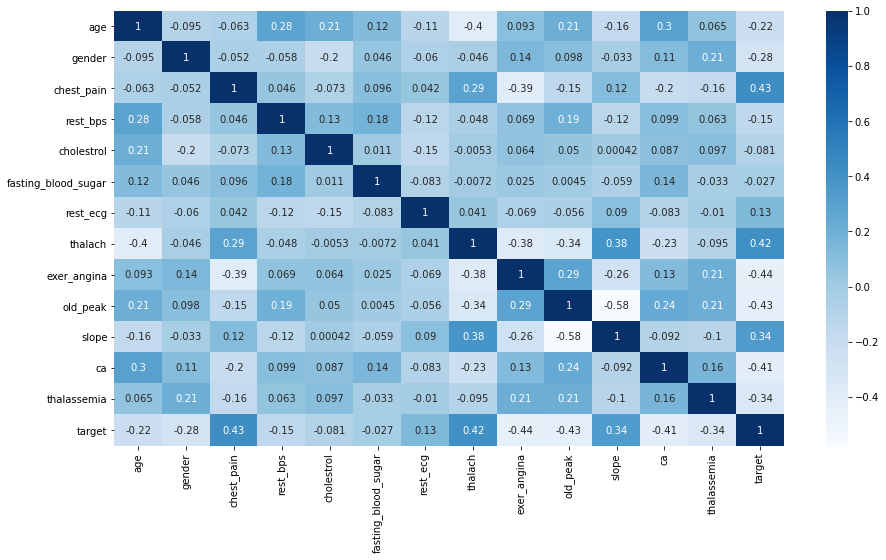

In [77]:
corr=df_heart.corr()
sns.heatmap(corr,cmap="Blues", annot=True)

In [13]:
df_heart.value_counts()

age  gender  chest_pain  rest_bps  cholestrol  fasting_blood_sugar  rest_ecg  thalach  exer_angina  old_peak  slope  ca  thalassemia  target
77   1       0           125       304         0                    0         162      1            0.0       2      3   2            0         1
51   0       0           130       305         0                    1         142      1            1.2       1      0   3            0         1
             2           130       256         0                    0         149      0            0.5       2      0   2            1         1
                         140       308         0                    0         142      0            1.5       2      1   2            1         1
     1       0           140       261         0                    0         186      1            0.0       2      0   2            1         1
                                                                                                                                 

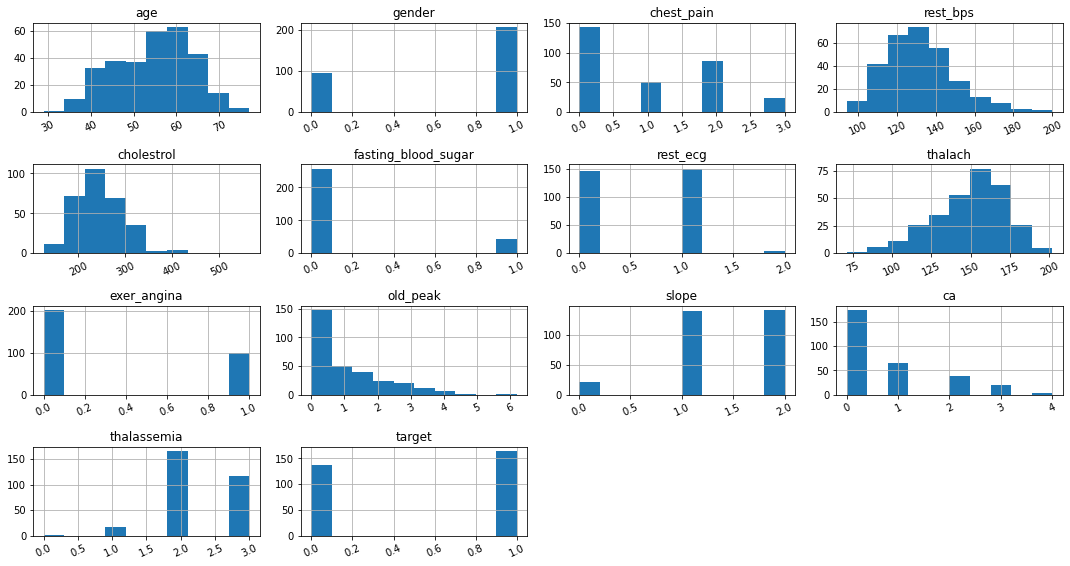

In [14]:
#Visualization
df_heart.hist(xrot = 25, )
plt.tight_layout()
plt.show()

In [15]:
# sns.boxplot(x = df_heart.iloc[:,1:-1], y = 'target', data = df_heart, ax = subplot)
    
# # display the plot
# plt.show()

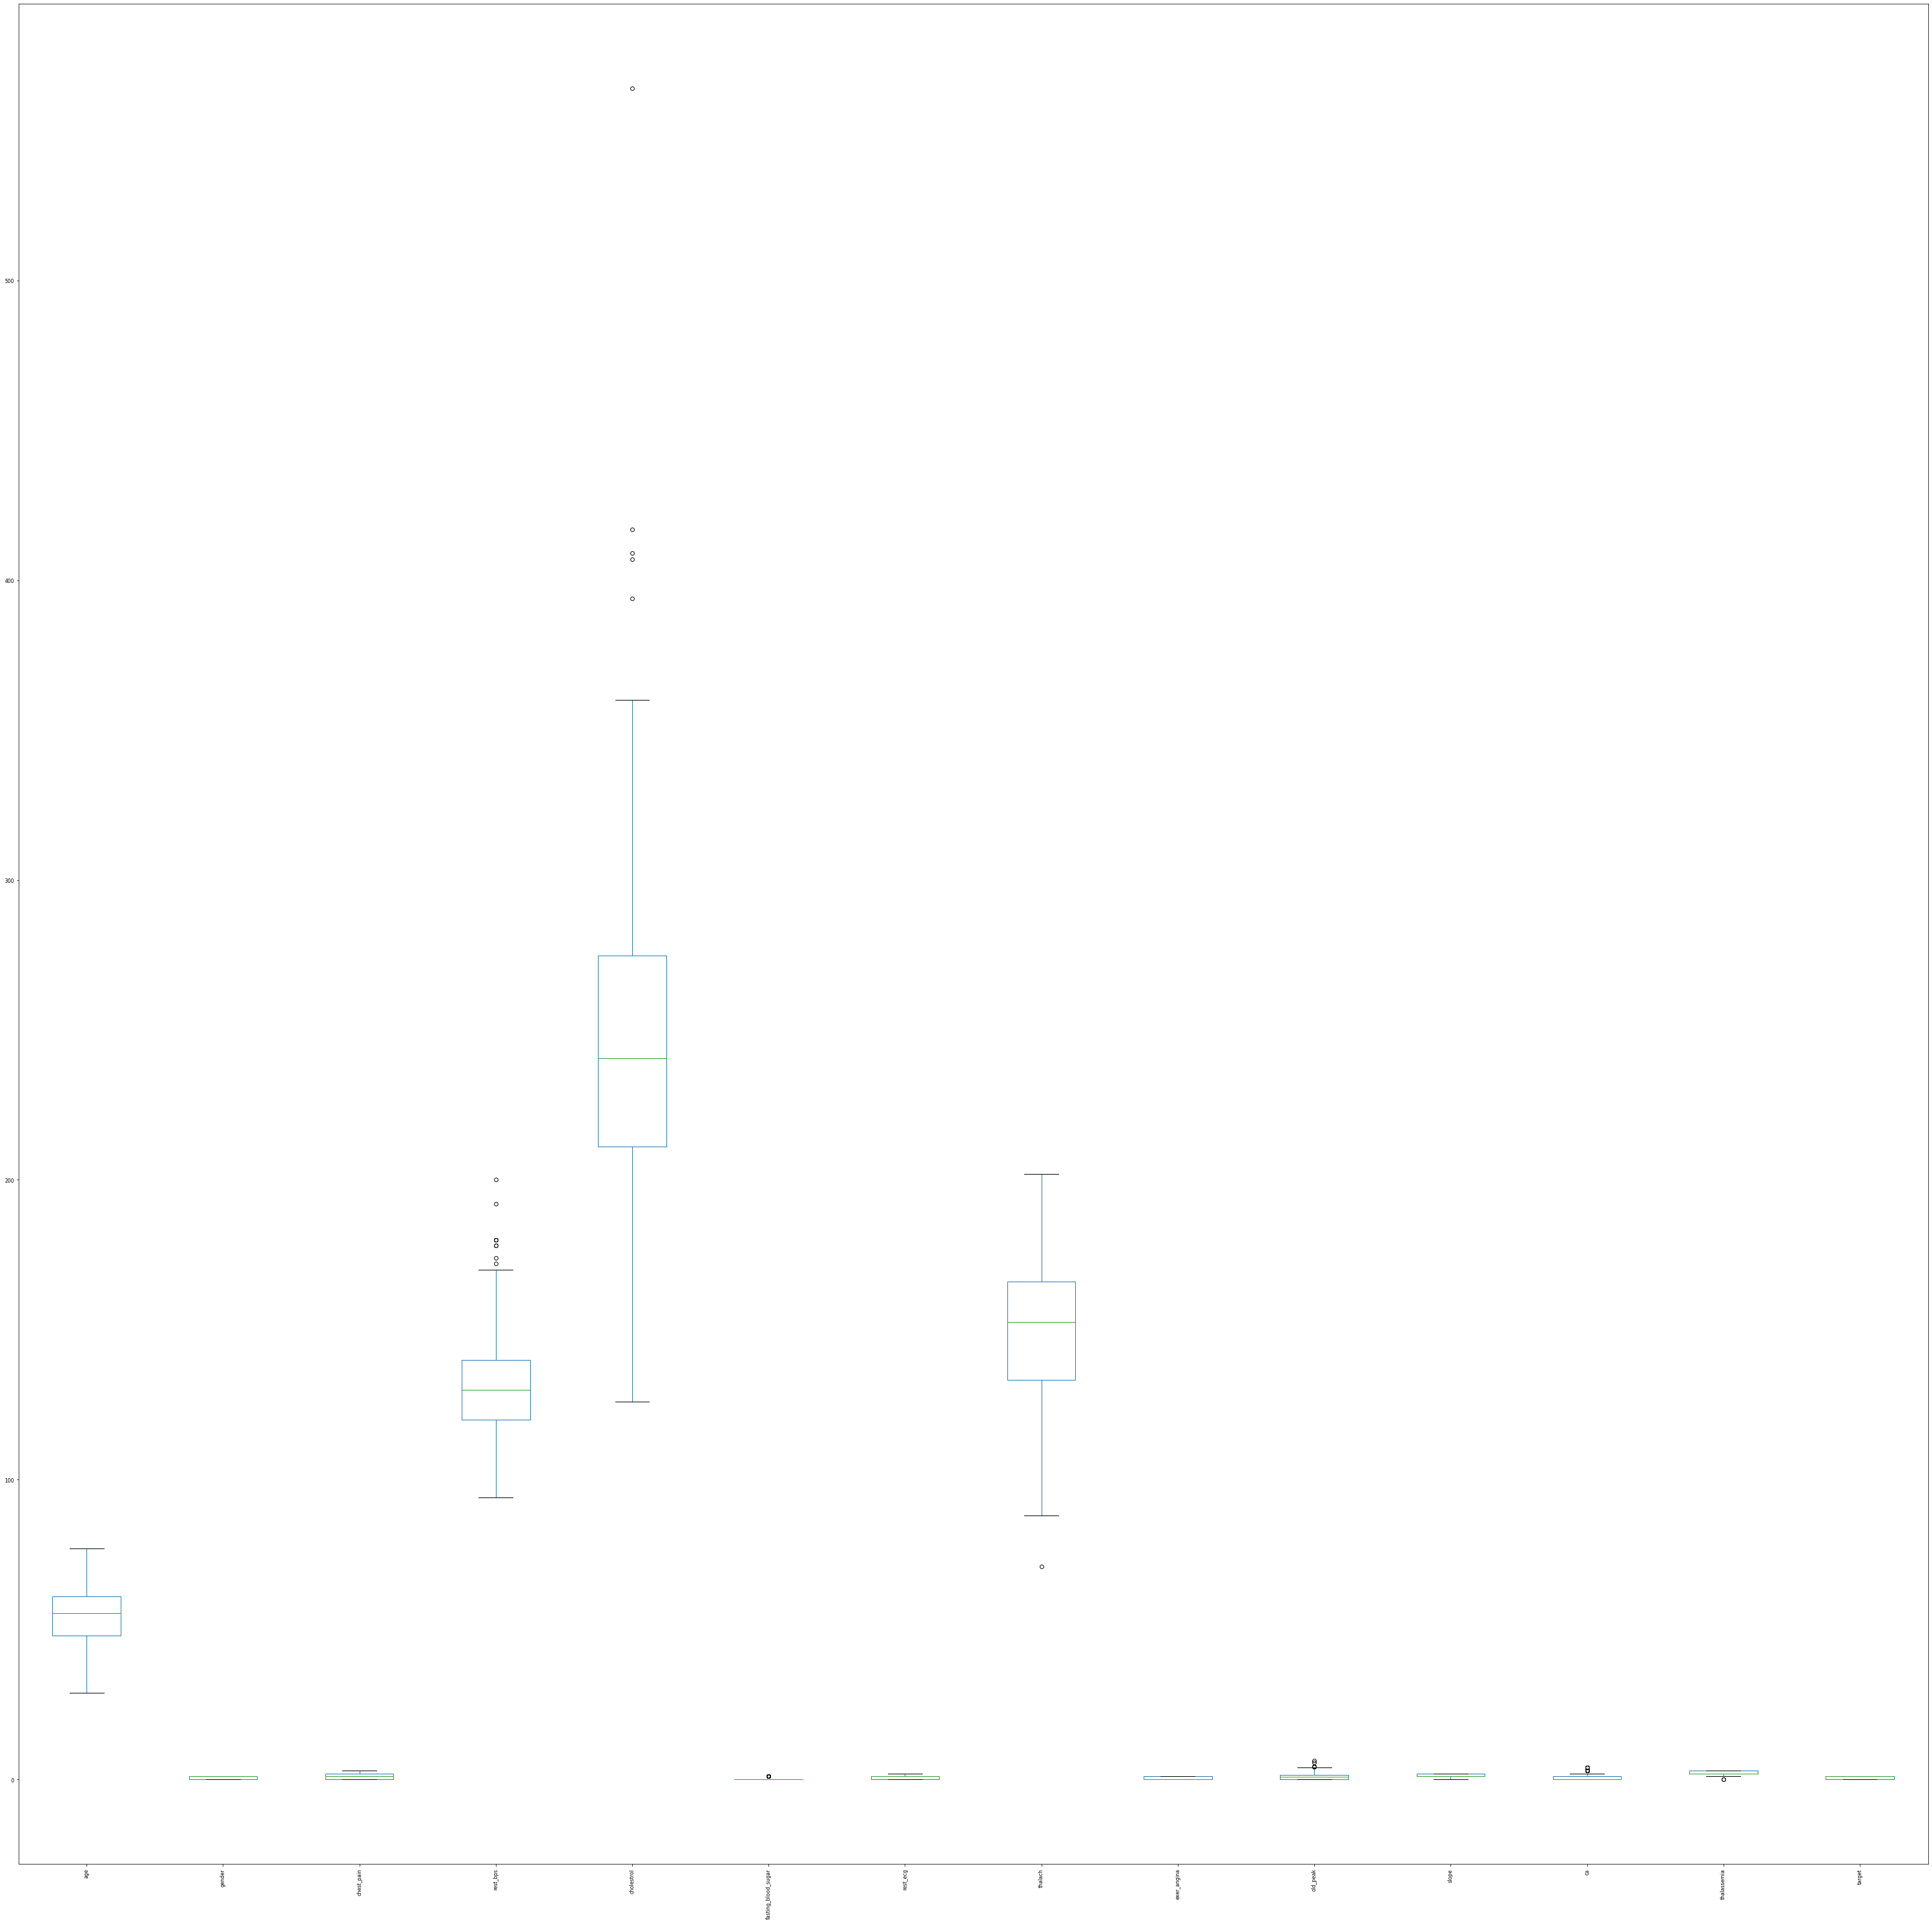

In [16]:
boxplot = df_heart.boxplot(figsize = (55,55), rot = 90, fontsize= '8', grid = False)

In [25]:
#preprocessing

x=df_heart.iloc[:,1:-1].values
y=df_heart.iloc[:,-1].values

In [67]:
x_train,x_test,y_tarin,y_test=train_test_split(x,y, test_size=.25)

In [68]:
x_test.shape

(76, 12)

In [69]:
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

#model apply
model= DecisionTreeClassifier()
model.fit(x_train,y_tarin)
predicted=model.predict(x_test)
cnfm=confusion_matrix(y_test,predicted)
acc=accuracy_score(y_test,predicted)
acc
#80

0.7894736842105263

In [79]:
model = DecisionTreeRegressor()
model.fit(x_train,y_tarin)
predicted=model.predict(x_test)
cnfm=confusion_matrix(y_test,predicted)
acc=accuracy_score(y_test,predicted)
acc


0.7763157894736842

In [71]:
model = GaussianNB()
model.fit(x_train,y_tarin)
predicted=model.predict(x_test)
cnfm=confusion_matrix(y_test,predicted)
acc=accuracy_score(y_test,predicted)
acc

0.8289473684210527

In [72]:
model = BernoulliNB()
model.fit(x_train,y_tarin)
predicted=model.predict(x_test)
cnfm=confusion_matrix(y_test,predicted)
acc=accuracy_score(y_test,predicted)
acc

0.9078947368421053

In [66]:
model = LogisticRegression()
model.fit(x_train,y_tarin)
predicted=model.predict(x_test)
cnfm=confusion_matrix(y_test,predicted)
acc=accuracy_score(y_test,predicted)
acc

0.8241758241758241